# DATA MINING AND MACHINE LEARNING

## Question 1.

### Introduction
<p>The goal of this project is to predict if certain passengers on the Titanic in the given database would get survived in the Titanic crushor not via training decision tree models.</p>
<p>I will use the training data (the first 40 records from the entire given data set) to develop a prodictive model. And then test in the test data set. </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 
from IPython.display import display

In [2]:
train = pd.read_csv('titanic-train.csv')
test = pd.read_csv('titanic-test.csv')

In [3]:
train.dtypes

PassengerId        int64
Survived           int64
PassengerClass     int64
Sex               object
Age                int64
SiblingSpouse      int64
ParentChild        int64
dtype: object

#### Data Dictionary
- PassengerId
- Survived: 0 = No | 1 = Yes.
- PassengerClass: (Ticket class) 1 = 1st class, 2 = 2nd class, 3 = 3rd class.
    - this field represent the social class of the passenger, whether the passenger is in hte first class, middle class, or the underline class.
- Sex: male or female
- Age: will categorize to 3 groups: 0 = child, 1 = teenager, and 2 = adult.
- SiblingSpouse: will categorize to 2 groups: 0 = zero, 1 = non-zero.
    - represent the number of siblings of the passenger on Titanic.
- ParentChild: will categorize to 2 groups: 0 = zero, 1 = non-zero
    - represent the number of parents and childs of the passenger on Titanic.

### Training Dataset

In [4]:
train.head()

,PassengerId,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChild
0,1,0,3,male,22,1,0
1,2,1,1,female,38,1,0
2,3,1,3,female,26,0,0
3,4,1,1,female,35,1,0
4,5,0,3,male,35,0,0


For attributes with value in numeric data types: 

In [5]:
train.describe()

,PassengerId,Survived,PassengerClass,Age,SiblingSpouse,ParentChild
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,0.425000,2.300000,27.375000,0.900000,0.525000
std,11.690452,0.500641,0.853349,15.923998,1.104768,1.198022
min,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000
25%,10.750000,0.000000,1.750000,17.250000,0.000000,0.000000
50%,20.500000,0.000000,3.000000,27.000000,1.000000,0.000000
75%,30.250000,1.000000,3.000000,38.000000,1.000000,0.250000
max,40.000000,1.000000,3.000000,66.000000,4.000000,5.000000


This shows that the PassengerId, Survived, PassengerClass, Age, SiblingSponse, and ParentChild attributes are numercial data.

For attributes with value in object data types: 

In [6]:
train.describe(include=['O'])

,Sex
count,40
unique,2
top,female
freq,22


This shows that among the 40 records in the training set, there were 22 female and the other 18 people were male.

In [7]:
print("More information about Train data: ")
train.info()

More information about Train data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
PassengerId       40 non-null int64
Survived          40 non-null int64
PassengerClass    40 non-null int64
Sex               40 non-null object
Age               40 non-null int64
SiblingSpouse     40 non-null int64
ParentChild       40 non-null int64
dtypes: int64(6), object(1)
memory usage: 2.3+ KB


### Testing Dataset

In [8]:
test.head()

,PassengerId,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChild
0,41,0,1,male,65,0.0,1
1,42,1,2,female,21,0.0,0
2,43,0,3,male,29,0.0,0
3,44,1,2,female,5,1.0,2
4,45,0,3,male,11,5.0,2


In [9]:
test.describe()

,PassengerId,Survived,PassengerClass,Age,SiblingSpouse,ParentChild
count,23.00000,23.000000,23.000000,23.000000,22.000000,23.000000
mean,52.00000,0.347826,2.478261,31.608696,1.000000,0.565217
std,6.78233,0.486985,0.730477,43.683510,1.690309,0.895752
min,41.00000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,46.50000,0.000000,2.000000,16.500000,0.000000,0.000000
50%,52.00000,0.000000,3.000000,25.000000,0.000000,0.000000
75%,57.50000,1.000000,3.000000,29.500000,1.000000,1.500000
max,63.00000,1.000000,3.000000,221.000000,5.000000,2.000000


In [10]:
test.describe(include=['O'])

,Sex
count,23
unique,2
top,male
freq,17


In [11]:
print("More information about Train data: ")
test.info()

More information about Train data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
PassengerId       23 non-null int64
Survived          23 non-null int64
PassengerClass    23 non-null int64
Sex               23 non-null object
Age               23 non-null int64
SiblingSpouse     22 non-null float64
ParentChild       23 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.3+ KB


As the requirement, there are 40 entries in the train dataset, and the rest (23 entries) are in the test dataset.

In [12]:
train.isnull().sum()

PassengerId       0
Survived          0
PassengerClass    0
Sex               0
Age               0
SiblingSpouse     0
ParentChild       0
dtype: int64

In [13]:
test.isnull().sum()

PassengerId       0
Survived          0
PassengerClass    0
Sex               0
Age               0
SiblingSpouse     1
ParentChild       0
dtype: int64

This shows that there is a missing entrie for SiblingSpouse in the testing dataset. 

### 1.  Cleaing and Pre-Process the data
- Categorised the data based on the "Age" attribute:
    - lable "Child" for records whose age is $<=$12
    - lable "Teenage" for records whose age is $>$12 and $<$20
    - lable "Adult" for records whose age is $>=$20
    

In [14]:
titanic = [train,test]

### 1.1 Age

In [15]:
train['AgeGrp'] = -1
test['AgeGrp'] = -1

In [16]:
for dataset in titanic:
    dataset.loc[ dataset['Age'] <= 12, 'AgeGrp'] = 0,
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 20), 'AgeGrp'] = 1,
    dataset.loc[ dataset['Age'] > 20, 'AgeGrp'] = 2

In [17]:
print("After categorize train data by Age: ")
train.head()

After categorize train data by Age: 


,PassengerId,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChild,AgeGrp
0,1,0,3,male,22,1,0,2
1,2,1,1,female,38,1,0,2
2,3,1,3,female,26,0,0,2
3,4,1,1,female,35,1,0,2
4,5,0,3,male,35,0,0,2


In [18]:
train.tail()

,PassengerId,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChild,AgeGrp
35,36,0,3,female,18,1,0,1
36,37,0,3,male,7,4,1,0
37,38,0,3,male,21,0,0,2
38,39,1,1,female,49,1,0,2
39,40,1,2,female,29,1,0,2


- Categorize data into two groups based on the value of the attributes "SiblingSpouse' and 'ParentChild'.


### 1.2 Sex

Categorize data based on sex in to 0 = male, and 1 = female.

In [19]:
sex_mapping = {"male": 0, "female": 1}
for dataset in titanic:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [20]:
# After categorizing based on Age:
train.head()

,PassengerId,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChild,AgeGrp
0,1,0,3,0,22,1,0,2
1,2,1,1,1,38,1,0,2
2,3,1,3,1,26,0,0,2
3,4,1,1,1,35,1,0,2
4,5,0,3,0,35,0,0,2


In [21]:
train['SiblSpGrp'] = 0
train['PrtCldGrp'] = 0
test['SiblSpGrp']= 0
test['PrtCldGrp']= 0

In [22]:
for dataset in titanic:
    dataset.loc[ dataset['SiblSpGrp'] == 0, 'SiblSpGrp'] = 0,
    dataset.loc[ dataset['SiblSpGrp'] > 0, 'SiblSpGrp'] = 1,
    dataset.loc[ dataset['PrtCldGrp'] == 0, 'PrtCldGrp'] = 0,
    dataset.loc[ dataset['PrtCldGrp'] > 0, 'PrtCldGrp'] = 1,

After categorize train data by SiblingSpouse and ParentChild attributes: 

In [23]:
train.head()

,PassengerId,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChild,AgeGrp,SiblSpGrp,PrtCldGrp
0,1,0,3,0,22,1,0,2,0,0
1,2,1,1,1,38,1,0,2,0,0
2,3,1,3,1,26,0,0,2,0,0
3,4,1,1,1,35,1,0,2,0,0
4,5,0,3,0,35,0,0,2,0,0


In [24]:
train.tail()

,PassengerId,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChild,AgeGrp,SiblSpGrp,PrtCldGrp
35,36,0,3,1,18,1,0,1,0,0
36,37,0,3,0,7,4,1,0,0,0
37,38,0,3,0,21,0,0,2,0,0
38,39,1,1,1,49,1,0,2,0,0
39,40,1,2,1,29,1,0,2,0,0


### 2. State the attributes and the class label for building the decision tree model.

Since we are interested in whether the passenger had been servived in the Titanic Crash, we could drop the **Survived** field from the dataset, and use it as a individual variable. It is also the target we want to predict.

In [25]:
# drop "Survived" attribute from the dataset and store it in a new variable.
train_target = train['Survived']
train_data = train.drop('Survived', axis=1)
train_data.dtypes

PassengerId       int64
PassengerClass    int64
Sex               int64
Age               int64
SiblingSpouse     int64
ParentChild       int64
AgeGrp            int64
SiblSpGrp         int64
PrtCldGrp         int64
dtype: object

In [26]:
# for testing dataset
test_target = test['Survived']
test_data = test.drop('Survived', axis=1)

Now, for every passenger, there exist a corresponding record in the target[i] for data.loc[i]. 

### Calculating Accuracy

In [27]:
# This function will return the accuracy score of the predict based on truth
def accuracy_scr(predict, truth):
    if len(truth) == len(predict):
        return "Accuracy of Prediction {:.2f}%.".format((truth == predict).mean()*100)
    else:
        return "Error in matching."


In [28]:
pred = pd.Series(np.ones(10, dtype = int))
print(accuracy_scr(pred, train_target[:10]))

Accuracy of Prediction 60.00%.


Since we don't have any information about if passengers were survived, I just predict there is no people in the Titanic Crash been survived (without consider any other information).

In [29]:
def non_suvivor_pred(data):
    pred = []
    for _, p in data.iterrows():
        pred.append(0)
    return pd.Series(pred)

In [30]:
pred = non_suvivor_pred(train_data)
print(accuracy_scr(pred, train_target))

Accuracy of Prediction 57.50%.


### Prediction based on single attribute

In [31]:
# This function will filter out the elements which do not match the filter_rule.
# Input: list
# Output: list
# filter_rule: a list of <attribute_name> <operator> <value>
def filter(data, filter_rule):
    attr, ope, val = filter_rule.split(" ")
    try:
        val = float(val)
    except:
        val = val.strip("\'\'")
    
    if ope == ">":
        matches = data[attr] > val
    elif ope == "<":
        matches = data[attr] < val
    elif ope == ">=":
        matches = data[attr] >= val
    elif ope == "<=":
        matches = data[attr] <= val
    elif ope == "==":
        matches = data[attr] == val
    elif ope == "!=":
        matches = data[attr] != val
    else: # invalid operator
        raise Exception("Invalid comparison operator.")
    
    # filter data and return result
    data = data[matches].reset_index(drop = True)
    return data   
    

In [32]:
# This function will return the selected attribute with survival statistics.
def static_survival(data, attr, result, rules=[]):
    if attr not in data.columns.values:
        print("'{}' is not exist in Titanic data".format(attr))
        return False
    
    # merge back "Survived" attribute and other data
    all_train_data = pd.concat([data,result], axis = 1)
    
    for rule in rules:
        all_train_data = filter(all_train_data, rule)
    
    all_train_data = all_train_data[[attr, 'Survived']]
    
    plt.figure(figsize=(8,6))
    
    # 'Numerical' attributes
    if(attr == 'Age'):
        
        # Remove NaN values from Age data
        all_train_data = all_train_data[~np.isnan(all_train_data[attr])]
        
        bins = [0,12,20,all_train_data[attr].max()]

        # Overlay each bin's survival rates
        nonsurvival_values = all_train_data[all_train_data['Survived'] == 0][attr].reset_index(drop = True)
        survival_values = all_train_data[all_train_data['Survived'] == 1][attr].reset_index(drop = True)
        plt.hist(nonsurvival_values, bins = bins, alpha = 0.4, color = 'red', label = 'Not survive')
        plt.hist(survival_values, bins = bins, alpha = 0.4, color = 'green', label = 'Survived')
    
        # Add legend to plot
        plt.xlim(0, all_train_data[attr].max())
        plt.legend(framealpha = 0.6)
        
    # 'Categorical' features
    else:
        if(attr == 'Sex'):
            values = [0,1]
            # values = ['male', 'female']
        if (attr == 'PassengerClass'):
            values = [1,2,3]
        if (attr == 'AgeGrp'):
            values = [0,1,2]
            
            
        frame = pd.DataFrame(index = np.arange(len(values)), columns=(attr,'Survived','NonSurvived'))
        for i, value in enumerate(values):
            frame.loc[i] = [value, \
                   len(all_train_data[(all_train_data['Survived'] == 1) & (all_train_data[attr] == value)]), \
                   len(all_train_data[(all_train_data['Survived'] == 0) & (all_train_data[attr] == value)])]

        # Set the width of each bar
        bar_wid = 0.4
        
        # Display each category's survival rates
        for i in np.arange(len(frame)):
            nonsurv_bar = plt.bar(i-bar_wid, frame.loc[i]['NonSurvived'], width = bar_wid, color = 'red')
            surv_bar = plt.bar(i, frame.loc[i]['Survived'], width = bar_wid, color = 'green')

            plt.xticks(np.arange(len(frame)), values)
            plt.legend((nonsurv_bar[0], surv_bar[0]),('Not survived', 'Survived'), framealpha = 0.4)
    
    plt.xlabel(attr)
    plt.ylabel('# of Passengers')
    plt.title('Survival Statistics With \'%s\' Attribute'%(attr))
    plt.show()

    # Report number of passengers with missing values
    if sum(pd.isnull(all_train_data[attr])):
        nan_outcomes = all_train_data[pd.isnull(all_train_data[attr])]['Survived']
        print("Passengers with missing '{}' values: {} ({} survived, {} did not survive)".format(attr, len(nan_outcomes), sum(nan_outcomes == 1), sum(nan_outcomes == 0)))

Consider how **Sex** will affect the survival for the passengers.

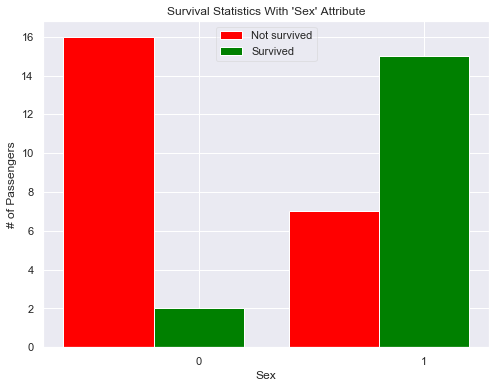

In [33]:
static_survival(train_data, 'Sex', train_target)

Consider how **Age** will affect the survival for the passengers.


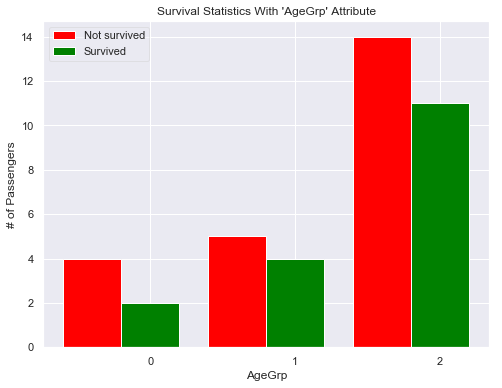

In [34]:
static_survival(train_data, 'AgeGrp', train_target)

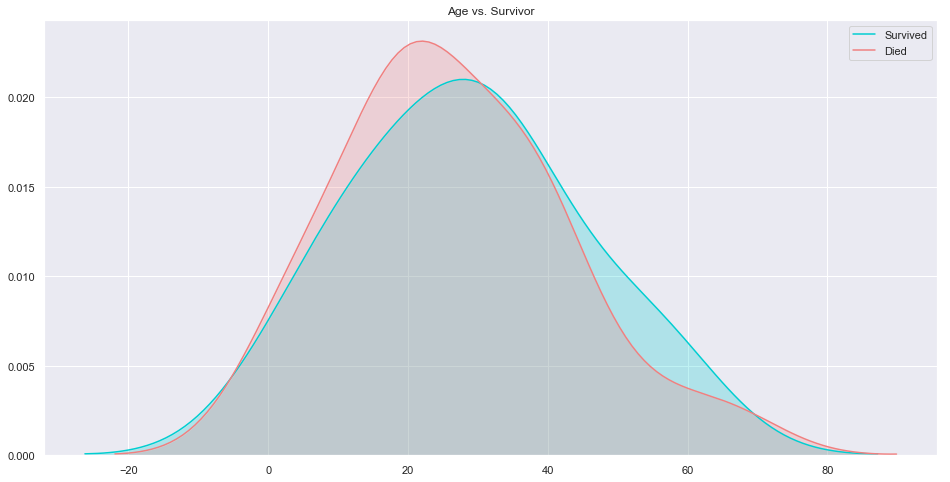

In [65]:
plt.figure(figsize=(16,8))
sns.kdeplot(train["Age"][train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["Age"][train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Age vs. Survivor')
plt.show()

Consider how **PassengerClass** will affect the survival for the passengers.

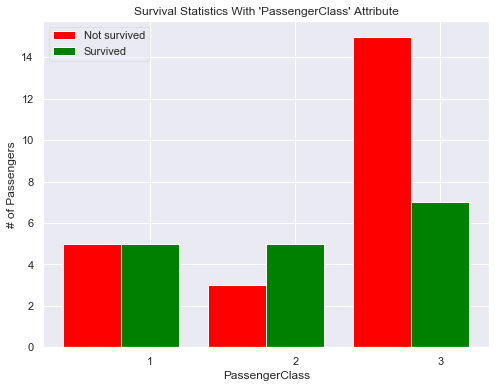

In [35]:
static_survival(train_data, 'PassengerClass', train_target)

/anaconda3/envs/Udacity_PyTorch/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


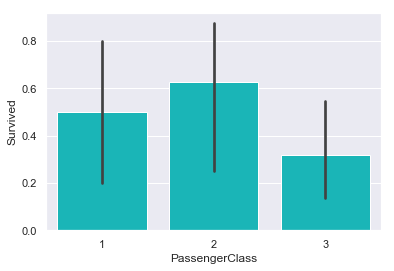

In [63]:
sns.barplot('PassengerClass', 'Survived', data=train, color="darkturquoise")
plt.show()

### Prediction based on mutiple attributes

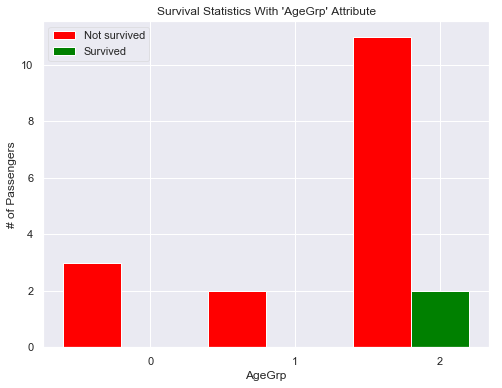

In [36]:
static_survival(train_data, 'AgeGrp', train_target, ["Sex == 0"])

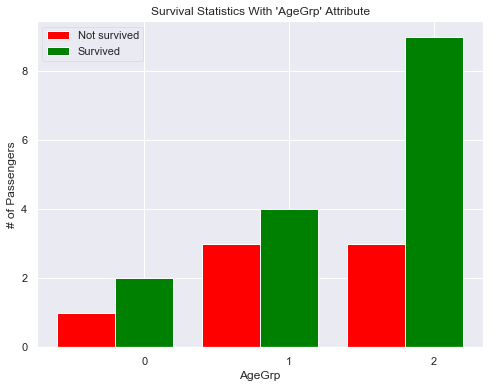

In [37]:
static_survival(train_data, 'AgeGrp', train_target, ["Sex == 1"])

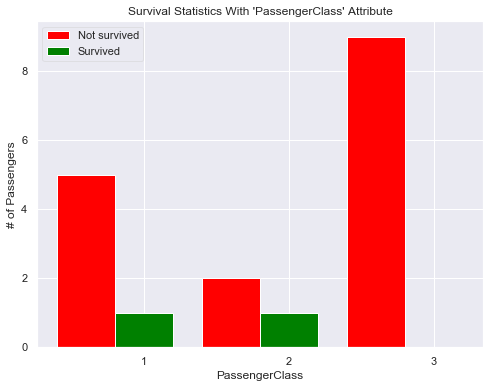

In [38]:
static_survival(train_data, 'PassengerClass', train_target, ["Sex == 0"])

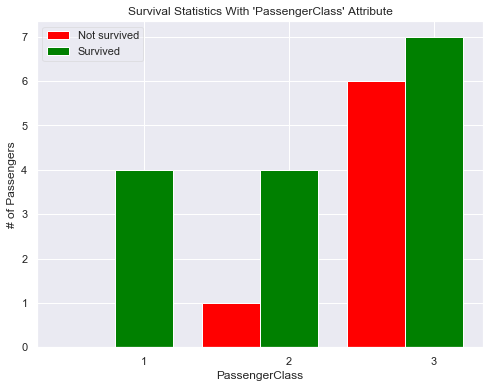

In [39]:
static_survival(train_data, 'PassengerClass', train_target, ["Sex == 1"])

### Modeling

In [40]:
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#### Cross Validation

In [41]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [42]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, train_target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.5  1.   0.25 0.5  0.5  0.25 0.75 0.5  0.75 1.  ]


decision tree model score

In [43]:
round(np.mean(score)*100, 2)

60.0

### Training the model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [45]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size=23/63, random_state=42)

In [46]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Test the model

Making predict:


In [47]:
y_train_pd = dtclf.predict(X_train)
y_test_pd = dtclf.predict(X_test)

Calculate the accuracy for training data nad test data:


In [48]:
train_accuracy = accuracy_scr(y_train_pd, y_train)
test_accuracy = accuracy_scr(y_test_pd, y_test)
print('The accuracy for training dataset is: ', train_accuracy)
print('The accuracy for testing dataset is: ', test_accuracy)

The accuracy for training dataset is:  Accuracy of Prediction 100.00%.
The accuracy for testing dataset is:  Accuracy of Prediction 66.67%.


In [49]:
pd.DataFrame(
    confusion_matrix(y_test, y_test_pd),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,7,4
True Survival,1,3


In [50]:
dt_tree = tree.DecisionTreeClassifier()

In [51]:
dt_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
dt_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
y_test_pd2 = dt_tree.predict(X_test)
test_accuracy = accuracy_scr(y_test_pd2, y_test)
print('The accuracy for testing dataset is: ', test_accuracy)

The accuracy for testing dataset is:  Accuracy of Prediction 60.00%.


In [59]:
import graphviz 

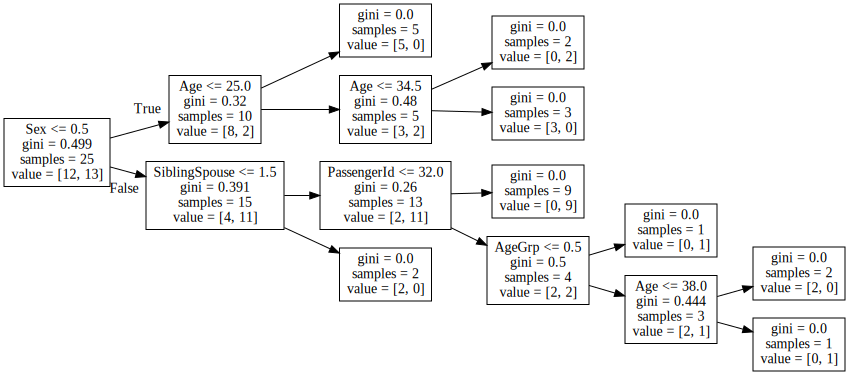

In [61]:
dt_tree_view = tree.export_graphviz(dt_tree, out_file=None, feature_names=train_data.columns.values, rotate=True)
dt_tree_vis = graphviz.Source(dt_tree_view)
dt_tree_vis

### Using Gini index


- Gini index:
    - the Gini index is a cost function used to evaluate splits in the dataset.
    - each split involves a input attribute and a value corresponding to the attribute, which could be used to divide training models into 2 groups of rows.
- Gini score:
    - the gini score gives an idea of how well the split is by how mixed the classes are in the 2 groups generated by the split.
    - a perfect separation result in a Gini score is 0.
    - a worst result in a Gini score is 0.5 which separate 50/50 classes in each of the two groups.
    